In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
dataset=pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [5]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
dataset['Price']=boston.target

In [7]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [8]:
X=dataset.iloc[:,:-1]

In [9]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
Y=dataset['Price']

In [11]:
Y.shape

(506,)

In [12]:
X.shape

(506, 13)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=10)

In [14]:
X_train.shape

(354, 13)

In [15]:
X_test.shape

(152, 13)

In [16]:
y_train.shape

(354,)

In [17]:
y_test.shape

(152,)

In [18]:
from sklearn.linear_model import Ridge

In [19]:
ridge_reg=Ridge()

In [20]:
ridge_reg

Ridge()

In [21]:
ridge_reg.fit(X_train,y_train)

Ridge()

In [22]:
ridge_reg.coef_

array([-1.49604427e-01,  6.60551631e-02, -5.11073555e-02,  1.51022000e+00,
       -7.97933889e+00,  3.40301049e+00,  4.70108624e-03, -1.43278342e+00,
        2.84292881e-01, -1.27159123e-02, -7.30445392e-01,  1.33495000e-02,
       -5.55124560e-01])

In [23]:
ridge_reg.intercept_

29.02543925856731

In [24]:
y_pred_ridge=ridge_reg.predict(X_test)

In [25]:
y_pred_ridge

array([31.29919063, 31.89033437, 30.76997268, 22.92409729, 20.17799572,
       16.50573656, 35.66395571, 14.79925564, 24.68477928, 36.88386127,
       21.25492674, 30.52628701, 27.92303804, 33.8658751 , 33.66023076,
       41.08518033, 24.77047079, 23.06077614, 25.52237449, 22.62667673,
       32.27241909, 18.28675243, 25.17203751, 25.27425851, 32.46587746,
       21.01690011, 19.20731935, 17.32306048, 38.0794539 , -0.58070343,
       32.01825454, 31.86657018, 26.38416461, 23.9943628 , 20.19315687,
       19.90691607,  3.78529342, 35.20877556, 27.16904741, 27.49180266,
       34.56633571, 29.5241256 , 18.39534462, 31.40459782, 17.4553014 ,
       28.61168479, 20.19684943, 21.31077999, 37.69954427, 16.61204249,
       24.11664746, 19.68221329, 24.26412501, 34.27444356, 27.07290535,
       35.25917529, 20.86496663, 20.68718598, 18.76845109, 24.7099079 ,
       20.069477  , 23.35286468, 39.22619642, 43.2661456 , 30.47529458,
       16.99309006, 23.65259557,  3.15212304, 31.23716131, 29.24

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'predicted values of y')

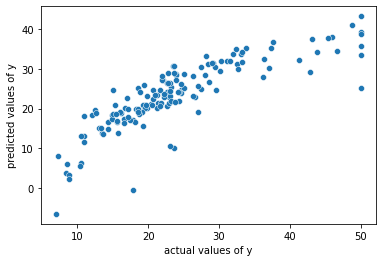

In [26]:
# Assumptions 
# plotting the graph between predicted values and actual values 

sns.scatterplot(y_test,y_pred_ridge)
plt.xlabel("actual values of y")
plt.ylabel("predicted values of y")

In [27]:
residuals_ridge=y_pred_ridge-y_test

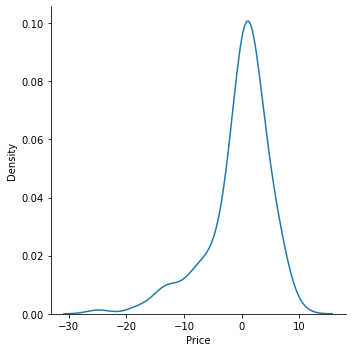

In [28]:
sns.displot(residuals_ridge,kind='kde')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'residuals')

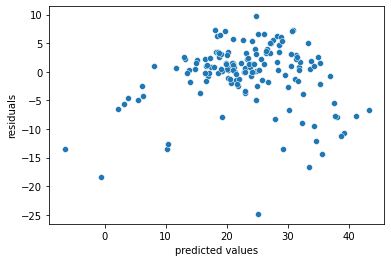

In [29]:
# scatterplot between residuals and pred values

sns.scatterplot(y_pred_ridge,residuals_ridge)
plt.xlabel("predicted values")
plt.ylabel("residuals")

In [30]:
from sklearn.metrics import r2_score

In [31]:
score_ridge=r2_score(y_test,y_pred_ridge)

In [33]:
adjusted_r2=1-(1-score_ridge)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [53]:
adjusted_r2

0.6651526009133615

# algerian forest fire



In [152]:
df=pd.read_csv("C:/Users/ADMIN/Desktop/neuronai/EDA/data/Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [153]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [154]:
df.loc[0:121,'Region']='Bejaia'
df.loc[124:,'Region']='Sidi-bel'

In [155]:
df[df['day']=='day'].index.tolist()

[123]

In [156]:
df.drop(labels=123,axis=0,inplace=True)

In [157]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         1
dtype: int64

In [158]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [159]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         1
dtype: int64

In [160]:
df[df['month'].isnull()].index

Int64Index([122], dtype='int64')

In [161]:
df.drop(labels=122,axis=0,inplace=True)

In [162]:
df['month'].isnull().sum()

0

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 30.5+ KB


In [164]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [165]:
df[df['DC']=='14.6 9']['DC']

167    14.6 9
Name: DC, dtype: object

In [166]:
df['DC']=np.where(df['DC']=='14.6 9','14.69',df['DC'])

In [167]:
df.drop(167,axis=0,inplace=True)

In [168]:
for i in df.columns[:-2]:
    print(i)
    df[i]=df[i].astype('float')

day
month
year
Temperature
 RH
 Ws
Rain 
FFMC
DMC
DC
ISI
BUI
FWI


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(13), object(2)
memory usage: 30.4+ KB


In [170]:
df['Classes  ']=df['Classes  '].str.strip()

In [171]:
df_class=pd.get_dummies(df['Classes  '],drop_first=True)

In [172]:
df['Classes  ']=df_class['not fire']

In [173]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,Bejaia
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,Bejaia
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,Bejaia
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,Bejaia
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,Sidi-bel
242,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,Sidi-bel
243,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,Sidi-bel
244,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,Sidi-bel


In [174]:
X=df.drop('Temperature',axis=1)
X.shape

(243, 14)

In [175]:
Y=df['Temperature']
Y.shape

(243,)

# train test split

In [343]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=10)


In [344]:
X_train=X_train.reset_index()

In [345]:
from sklearn.preprocessing import OneHotEncoder

encode=OneHotEncoder(drop='if_binary',handle_unknown='error',sparse=True)

In [346]:
X_train.columns

Index(['index', 'day', 'month', 'year', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [347]:
classes_encode=encode.fit_transform(X_train['Region'].values.reshape(-1,1)).toarray()

classes_encode.shape

(170, 1)

In [348]:
classes_encode

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],

In [349]:
classes_encode1=pd.DataFrame(classes_encode)
classes_encode1

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
165,0.0
166,0.0
167,1.0
168,1.0


In [350]:

classes_encode1=classes_encode1.rename(columns={0:'region1'})
classes_encode1.shape

(170, 1)

In [351]:
X_train.shape

(170, 15)

In [352]:
X_train=pd.concat([X_train,classes_encode1],axis=1,ignore_index=False)

In [353]:
X_train

,index,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,region1
0,39,10.0,7.0,2012.0,69.0,13.0,0.7,66.6,6.0,9.3,1.1,5.8,0.5,1,Bejaia,0.0
1,83,23.0,8.0,2012.0,53.0,16.0,0.0,89.5,37.6,161.5,10.4,47.5,22.3,0,Bejaia,0.0
2,171,18.0,7.0,2012.0,68.0,15.0,0.0,86.1,23.9,51.6,5.2,23.9,9.1,0,Sidi-bel,1.0
3,129,6.0,6.0,2012.0,54.0,11.0,0.1,83.7,8.4,26.3,3.1,9.3,3.1,0,Sidi-bel,1.0
4,244,29.0,9.0,2012.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,Sidi-bel,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,64,4.0,8.0,2012.0,69.0,13.0,0.0,85.0,8.2,19.8,4.0,8.2,3.9,0,Bejaia,0.0
166,15,16.0,6.0,2012.0,89.0,13.0,0.7,36.1,1.7,7.6,0.0,2.2,0.0,1,Bejaia,0.0
167,231,16.0,9.0,2012.0,26.0,13.0,0.0,93.9,21.2,59.2,14.2,22.4,19.3,0,Sidi-bel,1.0
168,127,4.0,6.0,2012.0,64.0,14.0,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1,Sidi-bel,1.0


In [354]:
 X_train.drop(labels=['Region'],inplace=True,axis=1)

In [387]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   day        170 non-null    float64
 1   month      170 non-null    float64
 2   year       170 non-null    float64
 3    RH        170 non-null    float64
 4    Ws        170 non-null    float64
 5   Rain       170 non-null    float64
 6   FFMC       170 non-null    float64
 7   DMC        170 non-null    float64
 8   DC         170 non-null    float64
 9   ISI        170 non-null    float64
 10  BUI        170 non-null    float64
 11  FWI        170 non-null    float64
 12  Classes    170 non-null    uint8  
 13  region1    170 non-null    float64
dtypes: float64(13), uint8(1)
memory usage: 17.6 KB


In [388]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   day        73 non-null     float64
 1   month      73 non-null     float64
 2   year       73 non-null     float64
 3    RH        73 non-null     float64
 4    Ws        73 non-null     float64
 5   Rain       73 non-null     float64
 6   FFMC       73 non-null     float64
 7   DMC        73 non-null     float64
 8   DC         73 non-null     float64
 9   ISI        73 non-null     float64
 10  BUI        73 non-null     float64
 11  FWI        73 non-null     float64
 12  Classes    73 non-null     uint8  
 13  Region     73 non-null     object 
dtypes: float64(12), object(1), uint8(1)
memory usage: 7.6+ KB


In [356]:
X_test

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
46,17.0,7.0,2012.0,70.0,14.0,0.0,82.8,9.4,34.1,3.2,11.1,3.6,0,Bejaia
228,13.0,9.0,2012.0,49.0,19.0,0.0,88.6,11.5,33.4,9.1,12.4,10.3,0,Sidi-bel
183,30.0,7.0,2012.0,56.0,16.0,0.0,88.9,23.8,57.1,8.2,23.8,13.2,0,Sidi-bel
116,25.0,9.0,2012.0,81.0,21.0,5.8,48.6,3.0,7.7,0.4,3.0,0.1,1,Bejaia
126,3.0,6.0,2012.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1,Sidi-bel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,23.0,8.0,2012.0,43.0,16.0,0.0,91.2,46.1,137.7,11.5,50.2,24.5,0,Sidi-bel
32,3.0,7.0,2012.0,76.0,20.0,0.7,63.1,2.6,9.2,1.3,3.0,0.5,1,Bejaia
111,20.0,9.0,2012.0,84.0,18.0,0.0,83.8,13.5,49.3,4.5,16.0,6.3,0,Bejaia
7,8.0,6.0,2012.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0,Bejaia


In [389]:
test_encode=encode.transform(X_test['Region'].values.reshape(-1,1)).toarray()

In [390]:
test_encode1=pd.DataFrame(test_encode)

In [391]:
X_test=X_test.reset_index()

In [392]:
X_test=pd.concat([X_test,test_encode1],axis=1)

In [393]:
X_test.rename(columns={0:'region1'},inplace=True)

In [396]:
X_test.drop(['index'],axis=1,inplace=True)

In [397]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   day        73 non-null     float64
 1   month      73 non-null     float64
 2   year       73 non-null     float64
 3    RH        73 non-null     float64
 4    Ws        73 non-null     float64
 5   Rain       73 non-null     float64
 6   FFMC       73 non-null     float64
 7   DMC        73 non-null     float64
 8   DC         73 non-null     float64
 9   ISI        73 non-null     float64
 10  BUI        73 non-null     float64
 11  FWI        73 non-null     float64
 12  Classes    73 non-null     uint8  
 13  region1    73 non-null     float64
dtypes: float64(13), uint8(1)
memory usage: 7.6 KB


In [423]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

In [424]:
X_test=scaler.transform(X_test)

In [425]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

In [426]:
lin_reg.coef_

array([-4.65940741e-01, -2.95367168e-01,  1.11022302e-16, -1.39187996e+00,
       -7.42373170e-01, -1.96502976e-01,  7.89794825e-01, -1.34432456e-02,
        8.78174777e-01,  3.27255538e-01,  1.43522815e-01, -5.29402027e-01,
       -2.68328235e-01,  1.32407817e-01])

In [427]:
y_pred=lin_reg.predict(X_test)

In [431]:
# find the r2 
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)

In [432]:
score

0.4694762440933973

<AxesSubplot:xlabel='Temperature'>

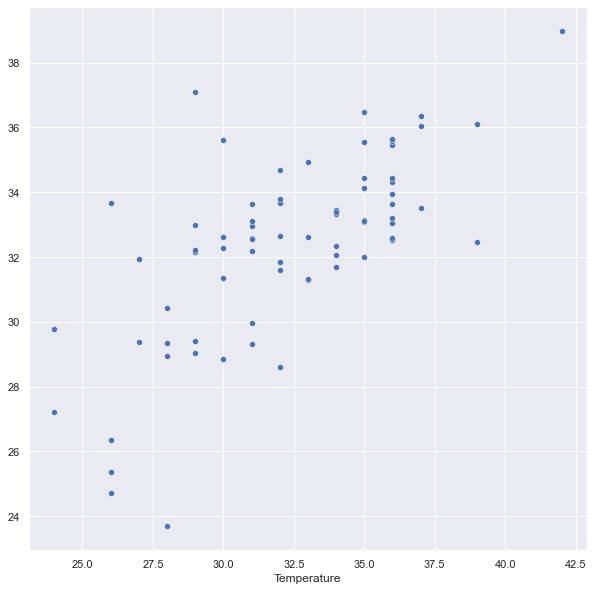

In [433]:
# assumption 1 - plot between predicted value and actual value
sns.scatterplot(x=y_test,y=y_pred)
# obsevations - since the score is very less so the scatter plot is not linear

In [434]:
residuals=y_test-y_pred

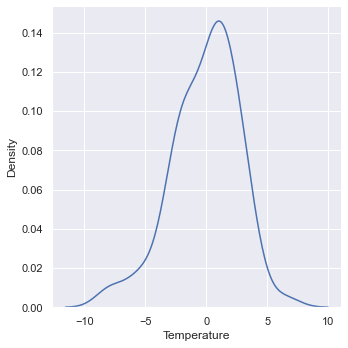

In [435]:
sns.displot(residuals,kind='kde')

<AxesSubplot:ylabel='Temperature'>

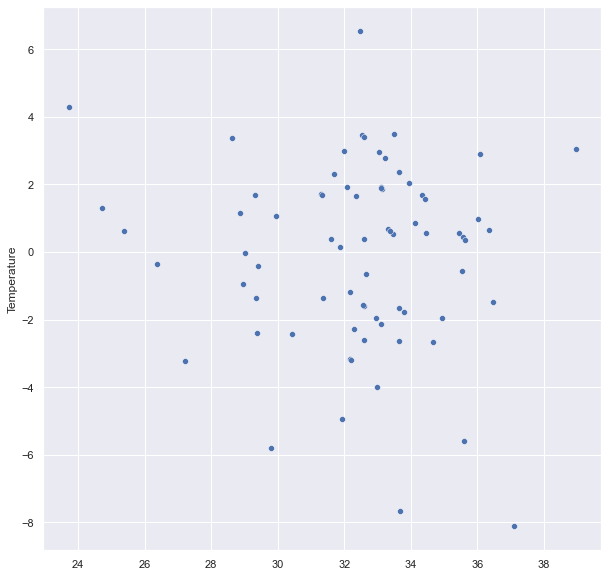

In [436]:
# assumption 3 scatterplot between y_pred and residuals 
sns.scatterplot(x=y_pred,y=residuals)

# performing ridge and lasso

In [440]:
from sklearn.linear_model import Ridge

ridge_reg=Ridge()



In [444]:
ridge_reg.fit(X_train,y_train)

Ridge()

In [452]:
y_pred_ridge=ridge_reg.predict(X_test)

In [454]:
score_ridge=r2_score(y_test,y_pred_ridge)

In [455]:
ridge_reg.intercept_

32.09411764705882

Text(0, 0.5, 'predicted values of y')

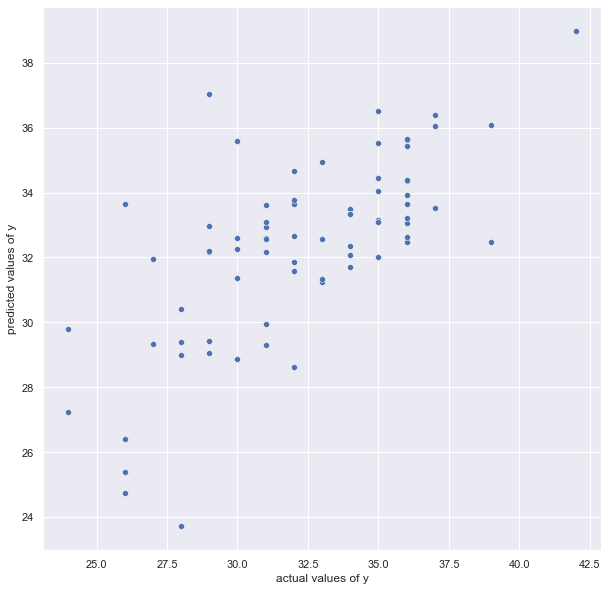

In [460]:
# assumption 1 - scatterplot between actual y value and predicted y value

sns.scatterplot(x=y_test,y=y_pred_ridge)
plt.xlabel("actual values of y")
plt.ylabel("predicted values of y")

In [469]:
# assumption 2 : displot of reiduals
residual_ridge=y_test-y_pred_ridge
residual_ridge.shape


(73,)

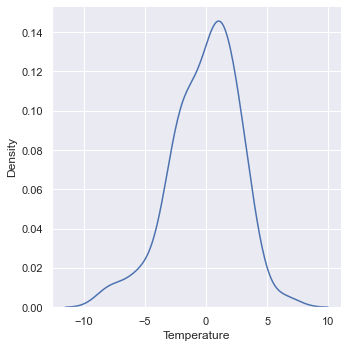

In [467]:
sns.displot(residual_ridge,kind='kde')

In [471]:
y_pred_ridge.shape

(73,)

Text(0, 0.5, 'residuals')

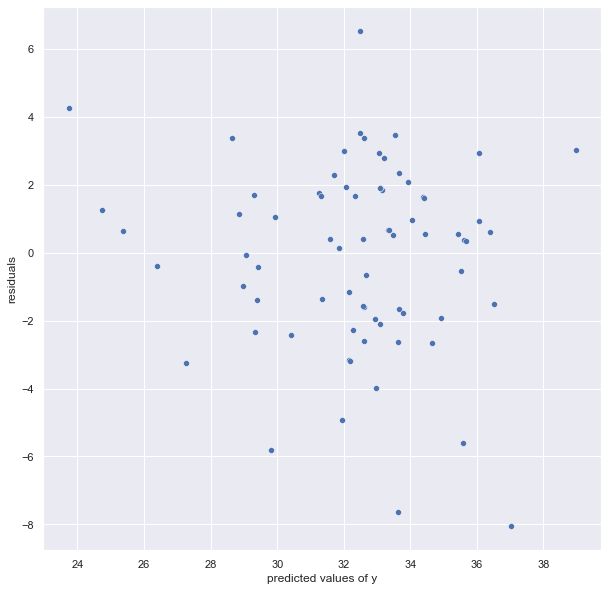

In [472]:
#assumption 3 - scatterplt between predicted values and residuals

sns.scatterplot(x=y_pred_ridge,y=residual_ridge)
plt.xlabel("predicted values of y")
plt.ylabel("residuals")

In [461]:
from sklearn.linear_model import Lasso

lasso=Lasso()

In [462]:
lasso.fit(X_train,y_train)

Lasso()

In [463]:
y_pred_lasso=lasso.predict(X_test)

In [464]:
score_lasso=r2_score(y_test,y_pred_lasso)

In [465]:
score_lasso

0.3956888066351977

Text(0, 0.5, 'predicted values of y')

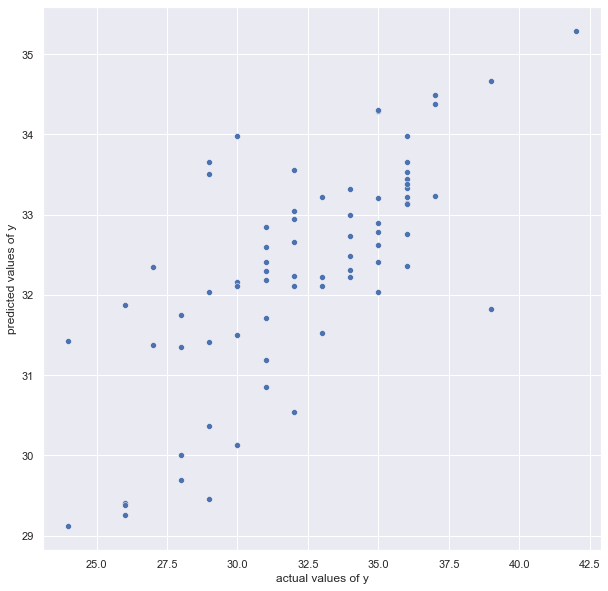

In [473]:
# assumption 1 : scatterplot between actual values of y and predicted value of y

sns.scatterplot(x=y_test,y=y_pred_lasso)
plt.xlabel("actual values of y")
plt.ylabel("predicted values of y")

In [474]:
# assumption 2 : displot of residuals 
residual_lasso=y_test-y_pred_lasso

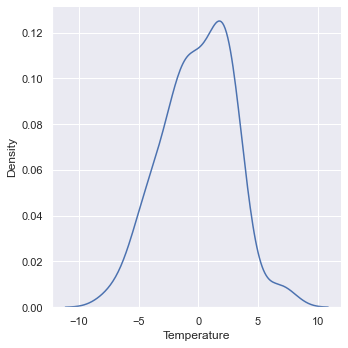

In [475]:
sns.displot(residual_lasso,kind='kde')

Text(0, 0.5, 'residuals')

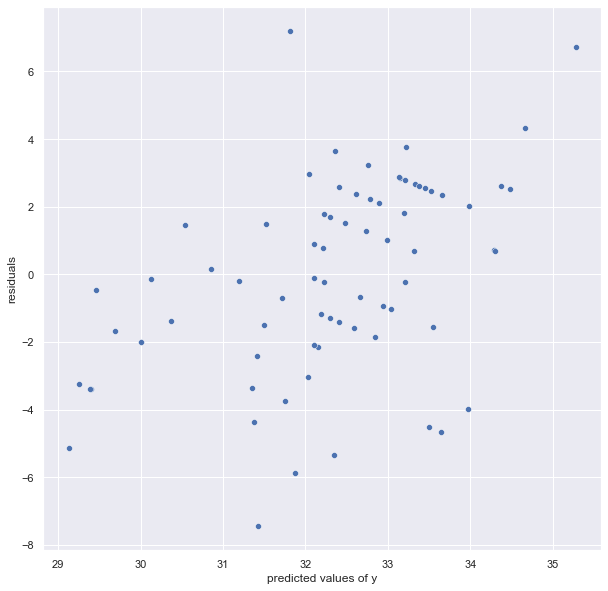

In [476]:
# assumption 3 : scatterplot between y-predicted and residuals 
sns.scatterplot(x=y_pred_lasso,y=residual_lasso)
plt.xlabel("predicted values of y")
plt.ylabel("residuals")